In [1]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

### Hermite interpolation

We use the Hermite interpolant
$$ h_n(x) = \sum_{j=0}^n f(x_j)A_j(x)  +\sum_{j=0}^n f'(x_j)B_j(x),  $$
where  for $j=0,\dots,n$, we have 
$$ A_j(x) = (1-2(x-x_j)\ell_j'(x_j)) \ell_j^2(x)\qquad B_j(x) = (x-x_j)\ell_j^2(x). $$
             
The derivative of the Lagrange basis vectors are 
             $$ \ell_j'(x) = \ell_j(x) \sum_{k=0,k\neq j}^n \frac{1}{x-x_k} \qquad j =0,\dots,n.$$
At the interpolating points, this formula simplifies. In particular, 
    $$ \ell_j'(x_j) =  \sum_{k=0,k\neq j}^n \frac{1}{x_j-x_k}\qquad j =0,\dots,n.$$


In [2]:
n = 5

xj = np.arange(n+1)/n
x = np.linspace(0,1,100)

# Construct the Lagrange basis functions 
ljlst = []
for j in range(n+1):
    lj = np.ones_like(x)
    for k in range(n+1):
        if k != j:
            lj *= (x-xj[k])/(xj[j]-xj[k])
    
    ljlst.append(lj)
    
# Compute derivatives at the interpolating points
ljder = np.zeros((n+1))
for j in range(n+1):
    temp = 0
    for k in range(n+1):
        if k != j:
            temp += 1/(xj[j]-xj[k])
    ljder[j] = temp

#### Plotting the Lagrange basis functions

Text(0.5, 1.0, 'Lagrange basis functions')

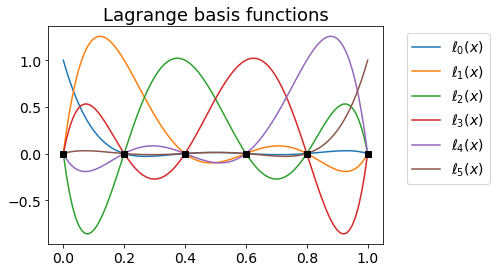

In [3]:
for k in range(n+1):
    plt.plot(x,ljlst[k], label = '$\ell_{%d}(x)$' % (k))
plt.plot(xj, 0*xj, 'ks')
plt.legend(bbox_to_anchor=(1.05, 1), fontsize = 14)
plt.title('Lagrange basis functions', fontsize = 18)

#### Plot the Hermite interpolating functions 

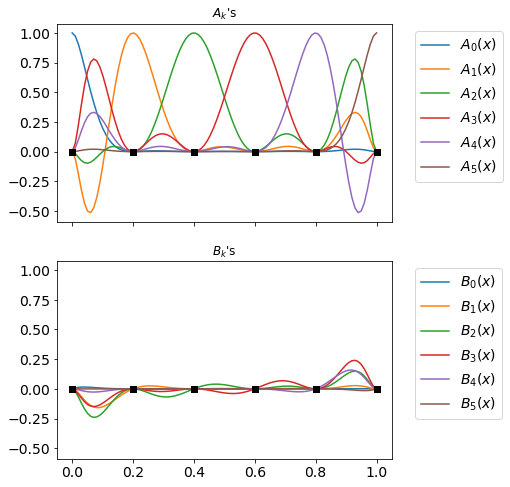

In [4]:
# Construct Ak and Bk
Aklst = []
Bklst = []
for k in range(n+1):
    Ak = (1-2*(x-xj[k])*ljder[k])*ljlst[k]**2.
    Aklst.append(Ak)
    
    Bk = (x-xj[k])*ljlst[k]**2.
    Bklst.append(Bk)


f, (ax1,ax2) = plt.subplots(2,1, sharey = True, sharex = True, figsize = (6,8))
for k in range(n+1):
    ax1.plot(x,Aklst[k],  label = '$A_{%d}(x)$' % (k))
    ax1.plot(xj, 0*xj, 'ks')
    ax2.plot(x,Bklst[k],   label = '$B_{%d}(x)$' % (k))
    ax2.plot(xj, 0*xj, 'ks')
ax1.set_title("$A_k$'s")
ax2.set_title("$B_k$'s")
ax1.legend(bbox_to_anchor=(1.05, 1), fontsize = 14)
ax2.legend(bbox_to_anchor=(1.05, 1), fontsize = 14)

### Hermite interpolant

Consider the function $f(x) = \sin(20x) + e^{5x/2}$ using equally spaced interpolating points in the interval $[0,1]$.

Text(0.5, 1.0, 'Hermite interpolant')

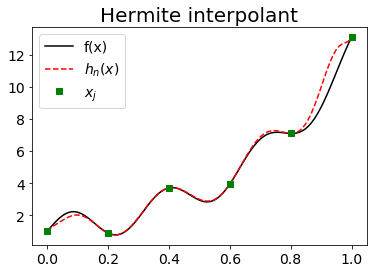

In [5]:
func = lambda x: np.sin(20*x) + np.exp(2.5*x)
fder = lambda x: 20*np.cos(20*x) + 2.5*np.exp(2.5*x)

fj = func(xj)
fpj = fder(xj)

finterp = np.zeros_like(x)
fderint = np.zeros_like(x)
for j in range(n+1):
    finterp += fj[j]*Aklst[j] + fpj[j]*Bklst[j]
    
    fderint += fpj[j]*Bklst[j]
   

plt.plot(x, func(x), 'k-', x, finterp, 'r--', xj, func(xj), 'gs')
plt.legend(('f(x)', '$h_n(x)$', '$x_j$'), fontsize = 14 )
plt.title('Hermite interpolant', fontsize = 20)